First, import needed modules

In [108]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

Initalize variables

In [109]:
path = os.getcwd()
print(path)

/Users/jan/Dropbox/UP_EPQM/2222/MA/powerlinemonsters


Import datasets

In [154]:
btw = pd.read_csv(f'{path}/data/btw.csv', encoding = 'UTF-8-SIG', sep=',', converters={'AGS': str})

View summary statistics

In [111]:
columns = ['year', 'Union', 'SPD', 'FDP', 'Linke', 'Grüne', 'Andere', 'treated_0', 'treated_10', 'treated_20', 'treated_30', 'treated_50', 'treated_100']
btw.describe().to_csv(f'{path}/tables/btw/btw_descriptives.csv', sep=';', encoding='utf-8-sig', decimal=',', columns=columns, float_format='%.2f')
btw[columns].describe()

/opt/homebrew/Caskroom/miniconda/base/envs/vscode/lib/python3.10/site-packages/numpy/lib/function_base.py:4527: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


,year,Union,SPD,FDP,Linke,Grüne,Andere,treated_0,treated_10,treated_20,treated_30,treated_50,treated_100
count,149579.000000,149579.000000,149579.000000,149579.000000,149579.000000,149579.000000,149579.000000,149579.000000,149579.000000,149579.000000,149579.000000,149579.000000,149579.000000
mean,2009.513388,45.059271,26.116566,7.721472,6.580276,6.650046,7.872370,0.045668,0.111687,0.171234,0.228956,0.341659,0.579928
std,5.377038,12.140237,11.606961,4.805968,7.073848,3.771058,7.471016,0.208765,0.314982,0.376715,0.420162,0.474267,0.493572
min,2002.000000,2.564103,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2005.000000,36.392915,16.944841,4.154303,2.356682,3.895784,2.483070,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2009.000000,44.105523,24.460432,6.818182,4.356436,6.038647,5.461394,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,2013.000000,52.820513,33.868243,10.360939,7.204117,8.713491,11.157244,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,2017.000000,100.000000,81.578947,63.132911,55.294118,54.545455,65.714286,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [112]:
btw['year'].value_counts().to_csv(f'{path}/tables/btw/btw_obsyears.csv', sep=';', encoding='utf-8-sig', decimal=',', float_format='%.2f')

Split data in Erst- and Zweitstimme

In [155]:
erst = btw[btw['first_vote'] == 1]
zweit = btw[btw['second_vote'] == 1]
erst.head(10)

,AGS,GEN,year,Land,post_2005,post_2009,post_2013,post_2017,first_vote,second_vote,...,avg_income,avg_age,age 0-17,age 18-24,age 25-44,age 45-64,age 65+,protestant,catholic,religion_other
0,01001000,Flensburg,2002.0,SH,0.0,0.0,0.0,0.0,1.0,NaN,...,27000.0,43.0,15.2,11.3,26.3,26.6,20.6,0.496815,0.063459,0.439726
1,01001000,Flensburg,2002.0,SH,0.0,0.0,0.0,0.0,1.0,NaN,...,27000.0,43.0,15.2,11.3,26.3,26.6,20.6,0.496815,0.063459,0.439726
4,01001000,Flensburg,2005.0,SH,1.0,0.0,0.0,0.0,1.0,NaN,...,27000.0,43.0,15.2,11.3,26.3,26.6,20.6,0.496815,0.063459,0.439726
5,01001000,Flensburg,2005.0,SH,1.0,0.0,0.0,0.0,1.0,NaN,...,27000.0,43.0,15.2,11.3,26.3,26.6,20.6,0.496815,0.063459,0.439726
8,01001000,Flensburg,2009.0,SH,1.0,1.0,0.0,0.0,1.0,NaN,...,27000.0,43.0,15.2,11.3,26.3,26.6,20.6,0.496815,0.063459,0.439726
9,01001000,Flensburg,2009.0,SH,1.0,1.0,0.0,0.0,1.0,NaN,...,27000.0,43.0,15.2,11.3,26.3,26.6,20.6,0.496815,0.063459,0.439726
12,01001000,Flensburg,2013.0,SH,1.0,1.0,1.0,0.0,1.0,NaN,...,27000.0,43.0,15.2,11.3,26.3,26.6,20.6,0.496815,0.063459,0.439726
13,01001000,Flensburg,2013.0,SH,1.0,1.0,1.0,0.0,1.0,NaN,...,27000.0,43.0,15.2,11.3,26.3,26.6,20.6,0.496815,0.063459,0.439726
16,01001000,Flensburg,2017.0,SH,1.0,1.0,1.0,1.0,1.0,NaN,...,27000.0,43.0,15.2,11.3,26.3,26.6,20.6,0.496815,0.063459,0.439726
17,01001000,Flensburg,2017.0,SH,1.0,1.0,1.0,1.0,1.0,NaN,...,27000.0,43.0,15.2,11.3,26.3,26.6,20.6,0.496815,0.063459,0.439726


Calculate average vote shares in all years by treated 50

In [114]:
erst_avg = erst[['Union', 'SPD', 'FDP', 'Linke', 'Grüne', 'Andere', 'treatment', 'year']].groupby(['treatment', 'year'], as_index = False).mean()
zweit_avg = zweit[['Union', 'SPD', 'FDP', 'Linke', 'Grüne', 'Andere','treatment', 'year']].groupby(['treatment', 'year'], as_index = False).mean()
erst_avg.head(10)

,treatment,year,Union,SPD,FDP,Linke,Grüne,Andere
0,0,2002.0,47.626195,39.499563,5.521812,1.838736,4.593782,0.919913
1,0,2005.0,47.297977,36.145385,4.426495,4.629020,4.323354,3.177768
2,0,2009.0,45.487094,26.659644,9.413406,7.977505,7.819317,2.643033
3,0,2013.0,50.639018,29.231424,2.285977,5.630475,5.766940,6.446167
4,0,2017.0,44.461955,24.749608,6.121540,5.677548,6.063460,12.925890
5,10,2002.0,47.146319,39.574254,5.866256,2.267306,4.322806,0.823059
6,10,2005.0,47.240940,35.716184,4.703543,5.394400,4.188205,2.756727
7,10,2009.0,44.913839,25.956163,10.018374,8.751269,7.493033,2.867321
8,10,2013.0,50.855646,27.985588,2.488443,6.293332,5.587062,6.789930
9,10,2017.0,43.731886,23.477620,6.360339,6.145694,5.943449,14.341012


Plot the average vote shares over years for treated and untreated municipalities

In [115]:
treatments = ['None', '0', '10', '20', '30', '50', '100']
blacks = ['#000000', '#191919', '#323232', '#4c4c4c', '#666666', '#7f7f7f', '#999999']
reds = ['#cc0000', '#d11919', '#d63232', '#db4c4c', '#e06666', '#e57f7f', '#ea9999']
yellows = ['#ffff00', '#ffff19', '#ffff32', '#ffff4c', '#ffff66', '#ffff7f', '#ffff99']
purples = ['#800080', '#8c198c', '#993299', '#a64ca6', '#b266b2', '#bf7fbf', '#cc99cc']
greens = ['#008000', '#198c19', '#329932', '#4ca64c', '#66b266', '#7fbf7f', '#99cc99']
greys = ['#808080', '#8c8c8c', '#999999', '#a6a6a6', '#b2b2b2', '#bfbfbf', '#cccccc']
markers = ['o', 's', 'v', 'D', '^', 'x', '.']

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(10, 10), dpi=300)
#set x labels
plt.setp(axes, xticks=[2002,2005,2009,2013,2017])
# set legend font size
plt.rc('legend',fontsize=6)
# title for entire figure
fig.suptitle(f'Average First Vote Shares \n by treatment status', fontsize=20)

for i, treatment in enumerate(treatments):
    plot_data = erst_avg[erst_avg['treatment'] == treatment]
    # edit subplots
    axes[0, 0].set_title('Union', fontsize=12)
    axes[0, 0].set_ylabel('% Votes', fontsize=10)
    axes[0, 0].plot(plot_data['year'], plot_data['Union'], color=blacks[i], marker = markers[i], label=treatment, lw=0.8, markersize=4)
    axes[0, 0].legend(loc='lower left')
    axes[0, 0].axvline(x=2014, color='red', linestyle='--')

    axes[0, 1].set_title('SPD', fontsize=12)
    axes[0, 1].set_ylabel('% Votes', fontsize=10)
    axes[0, 1].plot(plot_data['year'], plot_data['SPD'], color=reds[i], marker = markers[i], label=treatment, lw=0.8, markersize=4)
    axes[0, 1].legend(loc='lower left')
    axes[0, 1].axvline(x=2014, color='red', linestyle='--')

    axes[1, 0].set_title('FDP', fontsize=12)
    axes[1, 0].set_ylabel('% Votes', fontsize=10)
    axes[1, 0].plot(plot_data['year'], plot_data['FDP'], color=yellows[i], marker = markers[i], label=treatment, lw=0.8, markersize=4)
    axes[1, 0].legend(loc='upper left')
    axes[1, 0].axvline(x=2014, color='red', linestyle='--')

    axes[1, 1].set_title('Linke', fontsize=12)
    axes[1, 1].set_ylabel('% Votes', fontsize=10)
    axes[1, 1].plot(plot_data['year'], plot_data['Linke'], color=purples[i], marker = markers[i], label=treatment, lw=0.8, markersize=4)
    axes[1, 1].legend(loc='upper left')
    axes[1, 1].axvline(x=2014, color='red', linestyle='--')

    axes[2, 0].set_title('Grüne', fontsize=12)
    axes[2, 0].set_ylabel('% Votes', fontsize=10)
    axes[2, 0].plot(plot_data['year'], plot_data['Grüne'], color=greens[i], marker = markers[i], label=treatment, lw=0.8, markersize=4)
    axes[2, 0].legend(loc='upper left')
    axes[2, 0].axvline(x=2014, color='red', linestyle='--')

    axes[2, 1].set_title('Andere', fontsize=12)
    axes[2, 1].set_ylabel('% Votes', fontsize=10)
    axes[2, 1].plot(plot_data['year'], plot_data['Andere'], color=greys[i], marker = markers[i], label=treatment, lw=0.8, markersize=4)
    axes[2, 1].legend(loc='upper left')
    axes[2, 1].axvline(x=2014, color='red', linestyle='--')

# Save figure
fig.savefig(f'{path}/figures/btw/btw_vote_shares.png')
plt.close()

Plot a map with the partys who received the largest first vote share in each year for each municipality

In [136]:
# Load shapefiles
import geopandas as gpd
municipalities = gpd.read_file(f'{path}/data/geodata/municipalities.shp')
states = gpd.read_file(f'{path}/data/geodata/VG250_LAN.shp')
powerlines = gpd.read_file(f'{path}/data/geodata/new_powerlines.shp')
powerlines = powerlines.set_geometry('geometry')

In [122]:
# Prepare df with election winners
btw_win = erst[['AGS', 'year', 'Union', 'SPD', 'FDP', 'Linke', 'Grüne', 'Andere']]
btw_win['winner'] = erst[['Union', 'SPD', 'FDP', 'Linke', 'Grüne', 'Andere']].idxmax(axis = 1)
btw_win = btw_win[['AGS', 'year', 'winner']]
btw_win['winner'].describe()

/var/folders/wm/mtrphj0s0msgrmyshf3hgk740000gn/T/ipykernel_25639/4000089317.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  btw_win['winner'] = erst[['Union', 'SPD', 'FDP', 'Linke', 'Grüne', 'Andere']].idxmax(axis = 1)


count     74864
unique        6
top       Union
freq      59944
Name: winner, dtype: object

In [123]:
# Merge win and municipalities
btw_win_plot = pd.merge(btw_win, municipalities, on='AGS')
btw_win_plot = btw_win_plot.set_geometry('geometry')

In [124]:
# add color column to df
years = btw_win_plot.year.unique().astype(int).tolist()
colors = {'CDU': '#000000', 'SPD': '#cc0000', 'FDP': '#ffff00', 'Grüne': '#008000', 'Linke': '#800080', 'Andere': '#808080'}
btw_win_plot['color'] = 0
for party, color in colors.items():
    btw_win_plot['color'] = np.where(btw_win['winner'] == party, color, btw_win_plot['color'])

In [132]:
for year in years:
    plot_data = btw_win_plot[btw_win_plot['year'] == year]
    fig, ax = plt.subplots(figsize=(10, 8), dpi=300)
    ax.set_aspect('equal')
    ax.set_axis_off()
    municipalities.plot(ax=ax, color='lightblue', edgecolor='blue', lw=0.01, zorder=1)
    states.boundary.plot(ax=ax, color='darkblue', lw = 0.1, zorder=2)
    plot_data.plot(ax=ax, color=plot_data['color'], lw=0.01, zorder=1)
    powerlines.plot(ax=ax, color='red', lw=2, zorder=2)
    plt.title(f'Federal Election {year} \n Partys who receiced the largest first vote share', fontsize=20)
    ax.annotate('Source: Rajasthan Datastore, 2019',xy=(0.1, .08), xycoords='figure fraction', horizontalalignment='left', verticalalignment='top', fontsize=12, color='black')
    plt.savefig(f'{path}/figures/btw/btw_winners_{year}.png')
    plt.close()

Plot municipalities with data for office and postal ballot

In [148]:
#Prepare dfs
btw_postal = btw[btw['Vote type'] == 'postal']
btw_postal = btw_postal[['AGS', 'year']]

btw_office = btw[btw['Vote type'] == 'office']
btw_office = btw_office[['AGS', 'year']]

In [150]:
btw_postal.value_counts('year')
btw_office.value_counts('year')

year
2013.0    22288
2017.0    21952
2009.0    20575
2005.0    19281
2002.0    19186
dtype: int64

In [151]:
#office ballot
for year in years:
    btw_office_year = btw_office[btw_office['year'] == year]
    btw_office_plot = pd.merge(btw_office_year, municipalities, on='AGS')
    btw_office_plot = btw_office_plot.set_geometry('geometry')
    
    fig, ax = plt.subplots(figsize=(10, 8), dpi=300)
    ax.set_aspect('equal')
    ax.set_axis_off()
    municipalities.plot(ax=ax, color='lightblue', edgecolor='blue', lw=0.01, zorder=1)
    states.boundary.plot(ax=ax, color='darkblue', lw = 0.1, zorder=2)
    btw_office_plot.plot(ax=ax, color='#E9791A', edgecolor='darkorange', lw=0.01, zorder=3)
    #btw_other_plot.plot(ax=ax, color='green', edgecolor='darkorange', lw=0.01, zorder=4)
    powerlines.plot(ax=ax, color='red', lw=2, zorder=5)
    plt.title(f'Municipalities with office ballot data in {year}', fontsize=20)
    ax.annotate('Source: Rajasthan Datastore, 2019',xy=(0.1, .08), xycoords='figure fraction', horizontalalignment='left', verticalalignment='top', fontsize=12, color='black')
    plt.savefig(f'{path}/figures/btw/office_votes_{year}.png')
    plt.close()

In [147]:
#postal ballot
for year in years:
    btw_postal_year = btw_postal[btw_postal['year'] == year]
    btw_postal_plot = pd.merge(btw_postal_year, municipalities, on='AGS')
    btw_postal_plot = btw_postal_plot.set_geometry('geometry')
    
    fig, ax = plt.subplots(figsize=(10, 8), dpi=300)
    ax.set_aspect('equal')
    ax.set_axis_off()
    municipalities.plot(ax=ax, color='lightblue', edgecolor='blue', lw=0.01, zorder=1)
    states.boundary.plot(ax=ax, color='darkblue', lw = 0.1, zorder=2)
    btw_postal_plot.plot(ax=ax, color='#E9791A', edgecolor='darkorange', lw=0.01, zorder=3)
    #btw_other_plot.plot(ax=ax, color='green', edgecolor='darkorange', lw=0.01, zorder=4)
    powerlines.plot(ax=ax, color='red', lw=2, zorder=5)
    plt.title(f'Municipalities with postal ballot data in {year}', fontsize=20)
    ax.annotate('Source: Rajasthan Datastore, 2019',xy=(0.1, .08), xycoords='figure fraction', horizontalalignment='left', verticalalignment='top', fontsize=12, color='black')
    plt.savefig(f'{path}/figures/btw/postal_votes_{year}.png')
    plt.close()

Plot the development of vote types

In [156]:
vote_types = erst.groupby(['year', 'Vote type'], as_index=False).sum()

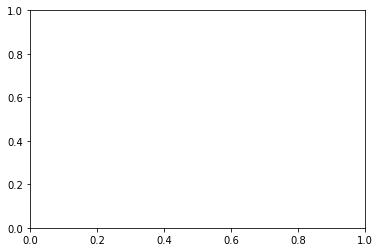

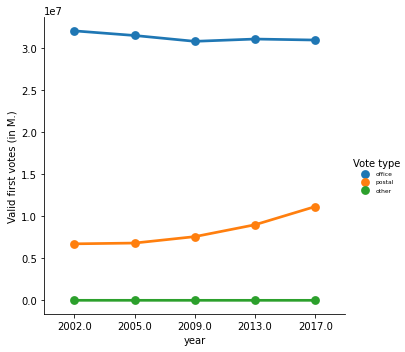

In [158]:
import seaborn as sns
fig, ax = plt.subplots()
g = sns.catplot(x='year', y='Gültig', hue='Vote type', kind='point', data=vote_types, hue_order=['office', 'postal', 'other'])
g.set(ylabel='Valid first votes (in M.)')
plt.show()

Inspect whether the share of municipalities with postal/other ballot data available varies significantly for treated and untreated municipalities

In [160]:
vote_types = btw[['AGS', 'year', 'Vote type', 'treatment']]
vote_types['postal'] = np.where(vote_types['Vote type'] == 'postal', 1, 0)
vote_types['office'] = np.where(vote_types['Vote type'] == 'office', 1, 0)
vote_types['other'] = np.where(vote_types['Vote type'] == 'other', 1, 0)
vote_types = vote_types[vote_types['year'] >= 2013]
vote_types.head()

/var/folders/wm/mtrphj0s0msgrmyshf3hgk740000gn/T/ipykernel_25639/2820199629.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vote_types['postal'] = np.where(vote_types['Vote type'] == 'postal', 1, 0)
/var/folders/wm/mtrphj0s0msgrmyshf3hgk740000gn/T/ipykernel_25639/2820199629.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vote_types['office'] = np.where(vote_types['Vote type'] == 'office', 1, 0)
/var/folders/wm/mtrphj0s0msgrmyshf3hgk740000gn/T/ipykernel_25639/2820199629.py:4: SettingWithCopyWarning: 

,AGS,year,Vote type,treatment,postal,office,other
12,01001000,2013.0,office,100,0,1,0
13,01001000,2013.0,postal,100,1,0,0
14,01001000,2013.0,office,100,0,1,0
15,01001000,2013.0,postal,100,1,0,0
16,01001000,2017.0,office,100,0,1,0


In [161]:
vote_types = vote_types.groupby(['treatment', 'year'], as_index=False).sum()
vote_types['postal/office'] = vote_types['postal']/vote_types['office']
vote_types['other/office'] = vote_types['other']/vote_types['office']
vote_types = vote_types.sort_values('treatment')
vote_types.head(20)

,treatment,year,postal,office,other,postal/office,other/office
0,0,2013.0,464,932,2,0.497854,0.002146
1,0,2017.0,476,908,2,0.524229,0.002203
2,10,2013.0,543,1490,0,0.364430,0.000000
3,10,2017.0,554,1462,0,0.378933,0.000000
4,100,2013.0,2074,5466,4,0.379437,0.000732
5,100,2017.0,2104,5358,2,0.392684,0.000373
6,20,2013.0,493,1348,2,0.365727,0.001484
7,20,2017.0,510,1330,0,0.383459,0.000000
8,30,2013.0,549,1236,0,0.444175,0.000000
9,30,2017.0,562,1222,0,0.459902,0.000000
